<a href="https://colab.research.google.com/github/rushikeshlatad/Cardiovascular_risk_prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Project Name -** Cardiovascular Risk Prediction

*   Project Type - ML Classification
*   Contribution - Individual
*   Member Name - Rushikesh Latad

###**Project Summary -** 

The goal of this project was to develop a model for predicting cardiovascular risk after ten years using machine learning techniques. The dataset used for this project consisted of demographic information, medical history, and laboratory test results for a sample of individuals. The model was trained using a supervised learning approach and evaluated using a variety of metrics such as accuracy, precision, recall, roc auc score.

The results of the project showed that the Random Forest Classifier model was able to accurately predict cardiovascular risk with an overall accuracy of 84%. The model performed particularly well in identifying high-risk individuals, with a recall of 89% for the high-risk class. These results suggest that the model could be used to identify individuals at high risk of cardiovascular disease, allowing for early intervention and prevention.

Overall, this project demonstrated the potential of machine learning techniques for predicting cardiovascular risk and highlights the importance of using a combination of demographic information, medical history, and laboratory test results to improve the accuracy of risk predictions.

###**GitHub Link -**

###**Problem Statement**

The problem statement of this project is to create machine learning model which predicts the risk of coronary heart disease after 10 years. 

###**Define Your Business Objective?**

The business objective of this project is to create a machine learning model that could be used to identify individuals at high risk of cardiovascular disease, allowing for early intervention and prevention.

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#load Dataset
df = pd.read_csv('/content/drive/MyDrive/Capstone Project Classification/data_cardiovascular_risk.csv')

In [ ]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


###Data Understanding

*   Sex: male or female("M" or "F")
*   Age: Age of the patient;
*   Is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
*   Cigs Per Day: the number of cigarettes that the person smoked on average in one day.
*   BP Meds: whether or not the patient was on blood pressure medication
*   Prevalent Stroke: whether or not the patient had previously had a stroke 
*   Prevalent Hyp: whether or not the patient was hypertensive
*   Diabetes: whether or not the patient had diabetes
*   Tot Chol: total cholesterol level 
*   Sys BP: systolic blood pressure
*   Dia BP: diastolic blood pressure
*   BMI: Body Mass Index
*   Heart Rate: heart rate 
*   Glucose: glucose level
*   TenYearCHD: Risk of coronary heart disease after 10 years.( Target Feature)














In [ ]:
df.shape

(3390, 17)

So there are 3390 observations and 17 features.

In [ ]:
df.dtypes

id                   int64
age                  int64
education          float64
sex                 object
is_smoking          object
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [ ]:
df.describe(include='all')

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1694.500000,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
#Checking class imbalance
df.TenYearCHD.value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

So we can see that the classes are imbalanced approximatly 85% data belongs to one class and only 15% data belongs to another class. So we have to take care of this while doing machine learning.

In [ ]:
len(df[df.duplicated()])

0

There is no duplicate observations.

In [ ]:
df.nunique()

id                 3390
age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

From the above we can say that 'education', 'sex', is_smoking', 'BPMeds', prevalentstrokes', prevalentHyp', 'diabetes' can be treted as catogorical features.

In [ ]:
#CHECKING NULL VALUES
df.isnull().sum()  

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

Here we can see that there are some features where null values are present

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


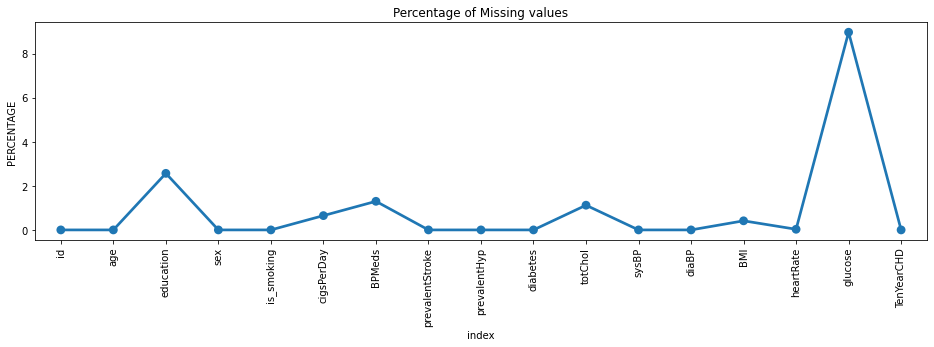

In [ ]:
missing_df = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,4))
ax = sns.pointplot('index',0,data=missing_df)
plt.xticks(rotation =90,fontsize =10)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

From the above plot we can see that the maximum null values in any feature is less than 10 % so we can replace those null values with either mean or mode but before that we have to see the ouitliers. because ouliers can affect the mean values

Checking Outliers and their impact on Target feature

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


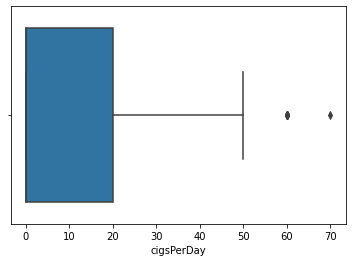

In [ ]:
sns.boxplot(df['cigsPerDay'])

In [ ]:
#impact of cigsPerDay on TenYearCHD
(df.loc[df['cigsPerDay']>=60])['TenYearCHD'].value_counts()  

0    7
1    2
Name: TenYearCHD, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


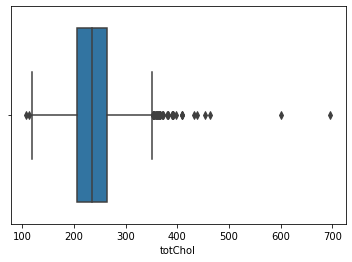

In [ ]:
sns.boxplot(df['totChol'])

In [ ]:
#impact of totChol on TenYearCHD
(df.loc[df['totChol']>360])['TenYearCHD'].value_counts()  

0    23
1     7
Name: TenYearCHD, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


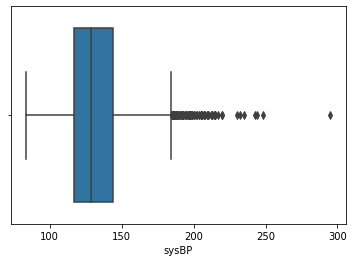

In [ ]:
sns.boxplot(df['sysBP'])

In [ ]:
#impact of sysBP on TenYearCHD
(df.loc[df['sysBP']>180])['TenYearCHD'].value_counts()

0    82
1    49
Name: TenYearCHD, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


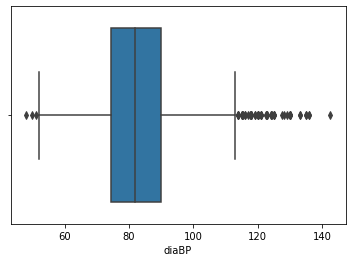

In [ ]:
sns.boxplot(df['diaBP'])

In [ ]:
#impact of diaBP on TenYearCHD
(df.loc[df['diaBP']>115])['TenYearCHD'].value_counts()

0    26
1    21
Name: TenYearCHD, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


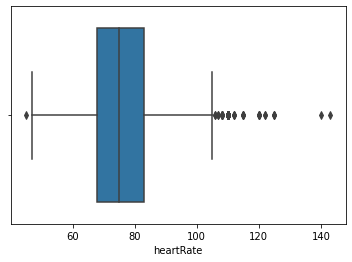

In [ ]:
sns.boxplot(df['heartRate'])

In [ ]:
#impact of heartRate on TenYearCHD
(df.loc[df['heartRate']>105])['TenYearCHD'].value_counts()

0    50
1    13
Name: TenYearCHD, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


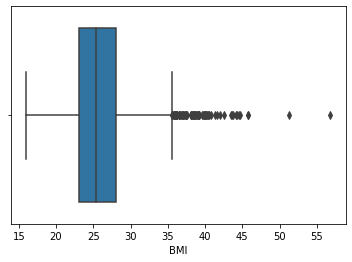

In [ ]:
sns.boxplot(df['BMI'])          

In [ ]:
#impact of BMI on TenYearCHD
(df.loc[df['BMI']>=40])['TenYearCHD'].value_counts()

0    17
1     5
Name: TenYearCHD, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


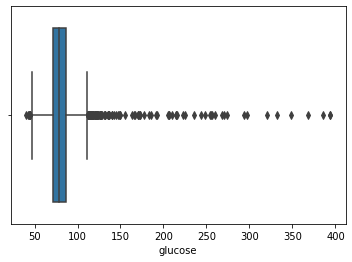

In [ ]:
sns.boxplot(df['glucose']) 

In [ ]:
#impact of glucose on TenYearCHD
(df.loc[df['glucose']>=120])['TenYearCHD'].value_counts()

0    48
1    41
Name: TenYearCHD, dtype: int64

After checking outliers and their impact on the target feature we can say that outliers has significant impact on target feature high value of any above feature may leads to Coronary Heart Disesase after ten years which is our target feature. So we will not replace any of the outlier.

Now lets replace NaN values with mean, mode or median

In [ ]:
df_copy = df.copy()

In [ ]:
median_value_cpd=df_copy['cigsPerDay'].median()
df_copy['cigsPerDay'].fillna(value=median_value_cpd, inplace=True)  #fill nana values in cigsperday column

mean_value_tch=df_copy['totChol'].mean()
df_copy['totChol'].fillna(value=mean_value_tch, inplace=True)   #fill nan values in totChol column

mean_value_bmi=df_copy['BMI'].mean()
df_copy['BMI'].fillna(value=mean_value_bmi, inplace=True)   #fill nan values in bmi column

median_value_hr=df_copy['heartRate'].median()
df_copy['heartRate'].fillna(value=median_value_hr, inplace=True)   #fill nan values in heartrate column

median_value_glu=df_copy['glucose'].median()
df_copy['glucose'].fillna(value=median_value_glu, inplace=True)    #fill nan values in glucose column

df_copy['education']=df_copy['education'].replace(to_replace = np.nan, value= 1.0)  #replacing nan values in education column
df_copy['BPMeds']=df_copy['BPMeds'].replace(to_replace = np.nan, value= 0.0)    #replacing nan values in BPMeds column

In [ ]:
df_copy.isnull().sum() 

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

Null values are replaced.

##**Exploratay Data Analysis**

In [ ]:
df_copy.head(1)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1


SEX

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


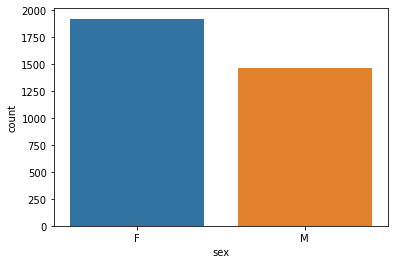

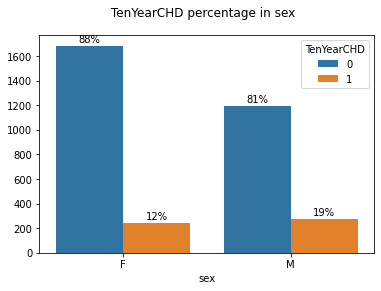

In [ ]:
sns.countplot(df_copy['sex'])  

plt.figure(figsize=(6,4))
a = sns.countplot( x='sex',data=df_copy, hue="TenYearCHD")
a.set_ylabel('')
plt.suptitle(' TenYearCHD percentage in sex')

bars = a.patches
half = int(len(bars)/2)       #this will divide the a.patches into 2 equal parts(blue and orange) 
left_bars = bars[:half]  #blue color bar
right_bars = bars[half:]   #orange color bar


for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()   #getting the height of left part
        height_r = right.get_height()  #getting the height of rigtht part
        total = height_l + height_r    #combining both the heights of both halfs and finding total height of bars i.e. a.patches


        a.text(left.get_x() + left.get_width()/2., height_l + 30, '{0:.0%}'.format(height_l/total), ha="center")#ploting percentages on top of the bars and at centre.
        a.text(right.get_x() + right.get_width()/2., height_r + 30, '{0:.0%}'.format(height_r/total), ha="center")

Here we can see that males has higher chance of getting CHD after ten years because we have less males than females in our dataset and outff all those males 19% has a chance of getting CHD which is only 12% is in females.

EDUCATION

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


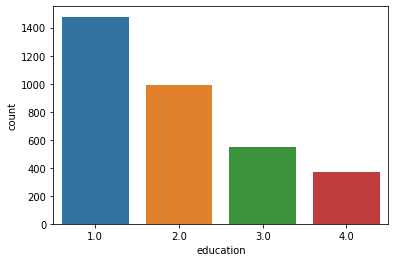

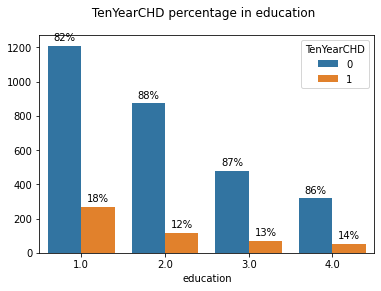

In [ ]:
sns.countplot(df_copy['education'])  

plt.figure(figsize=(6,4))
a = sns.countplot( x='education',data=df_copy, hue="TenYearCHD")
a.set_ylabel('')
plt.suptitle(' TenYearCHD percentage in education')

bars = a.patches
half = int(len(bars)/2)       #this will divide the a.patches into 2 equal parts(blue and orange) 
left_bars = bars[:half]  #blue color bar
right_bars = bars[half:]   #orange color bar


for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()   #getting the height of left part
        height_r = right.get_height()  #getting the height of rigtht part
        total = height_l + height_r    #combining both the heights of both halfs and finding total height of bars i.e. a.patches


        a.text(left.get_x() + left.get_width()/2., height_l + 30, '{0:.0%}'.format(height_l/total), ha="center")#ploting percentages on top of the bars and at centre.
        a.text(right.get_x() + right.get_width()/2., height_r + 30, '{0:.0%}'.format(height_r/total), ha="center")

These graph doesnt shoow anything relevent with target variable and we know that education could not be indicator for chance of CHD.

AGE

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


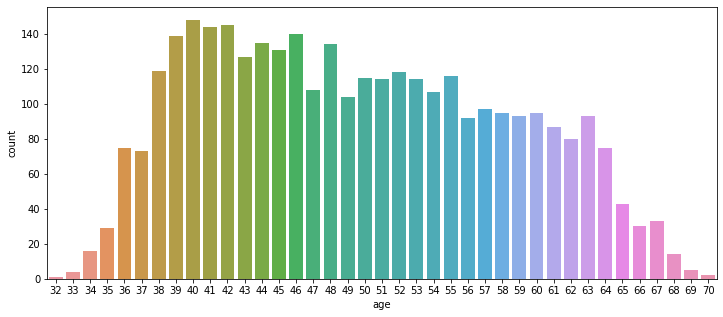

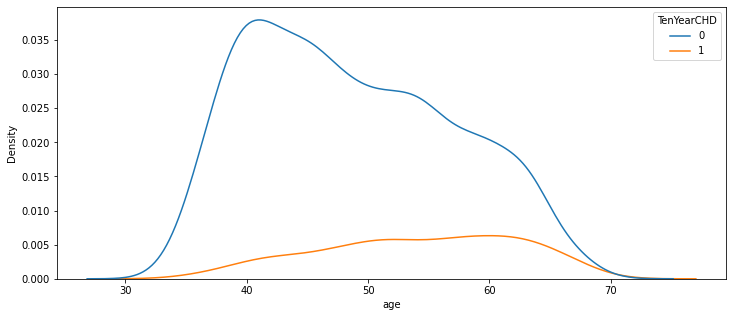

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(df_copy['age'])  

plt.figure(figsize=(12,5))
sns.kdeplot( x='age',data=df_copy, hue="TenYearCHD")

These graph is intresting our majority population is in age between 38-64, and from the second plot we can see that as soon as the age increases the chances of getting CHD is also increasing we can see that after age 38 the graph of tenyearCHD is continusly increasing til 64 and after 64 it started decling because population also started declning in that age group.

IS_SMOKING

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


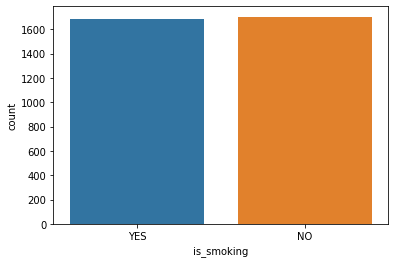

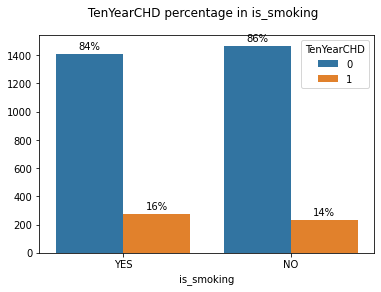

In [ ]:
sns.countplot(df_copy['is_smoking'])  

plt.figure(figsize=(6,4))
a = sns.countplot( x='is_smoking',data=df_copy, hue="TenYearCHD")
a.set_ylabel('')
plt.suptitle(' TenYearCHD percentage in is_smoking')

bars = a.patches
half = int(len(bars)/2)       #this will divide the a.patches into 2 equal parts(blue and orange) 
left_bars = bars[:half]  #blue color bar
right_bars = bars[half:]   #orange color bar


for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()   #getting the height of left part
        height_r = right.get_height()  #getting the height of rigtht part
        total = height_l + height_r    #combining both the heights of both halfs and finding total height of bars i.e. a.patches


        a.text(left.get_x() + left.get_width()/2., height_l + 30, '{0:.0%}'.format(height_l/total), ha="center")#ploting percentages on top of the bars and at centre.
        a.text(right.get_x() + right.get_width()/2., height_r + 30, '{0:.0%}'.format(height_r/total), ha="center")

it can seen that weeather a patient smoke or dont smoke it doest have significant impact on chance of CHD.

CIGERATES PER DAY

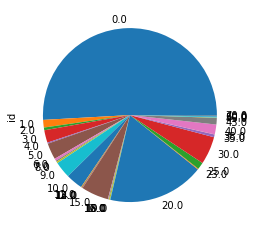

In [ ]:
df_copy.groupby(['cigsPerDay'])['id'].count().plot(kind='pie')

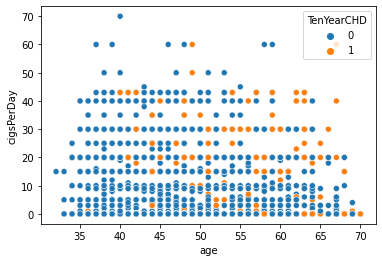

In [ ]:
sns.scatterplot(x=df_copy['age'], y=df_copy['cigsPerDay'], hue=df_copy['TenYearCHD'])

from the IS_SMOKING charts we said that the smoking or no smoking has no significant impact on tenyearCHD but, here we can see that those patients who are above the age of 55 and dont smoke has still chances of getting CHD. On the other hand those who take more than 10 cigerates per day has high chance of CHD. But age below 40 weather they smoke or no smoke they has very less chance of getting CHD than others.

BPMEDS

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


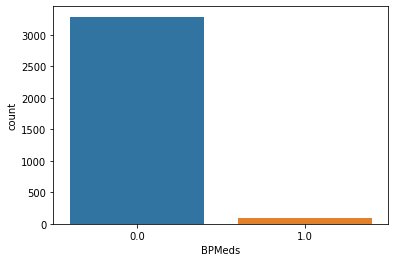

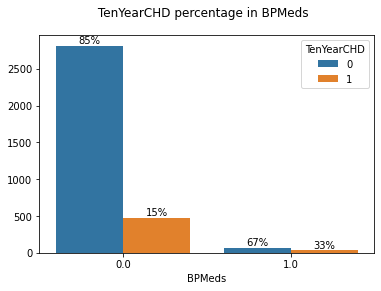

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(df_copy['BPMeds'])  


plt.figure(figsize=(6,4))
a = sns.countplot( x='BPMeds',data=df_copy, hue="TenYearCHD")
a.set_ylabel('')
plt.suptitle(' TenYearCHD percentage in BPMeds')

bars = a.patches
half = int(len(bars)/2)       #this will divide the a.patches into 2 equal parts(blue and orange) 
left_bars = bars[:half]  #blue color bar
right_bars = bars[half:]   #orange color bar


for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()   #getting the height of left part
        height_r = right.get_height()  #getting the height of rigtht part
        total = height_l + height_r    #combining both the heights of both halfs and finding total height of bars i.e. a.patches


        a.text(left.get_x() + left.get_width()/2., height_l + 30, '{0:.0%}'.format(height_l/total), ha="center")#ploting percentages on top of the bars and at centre.
        a.text(right.get_x() + right.get_width()/2., height_r + 30, '{0:.0%}'.format(height_r/total), ha="center")

those who are taking BPmeds has chances of getting CHD.

PREVALENTSTROKE

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


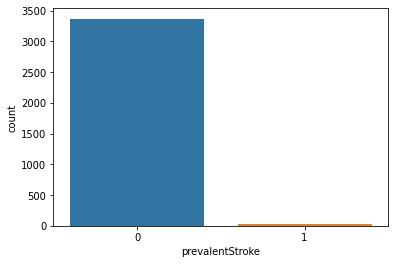

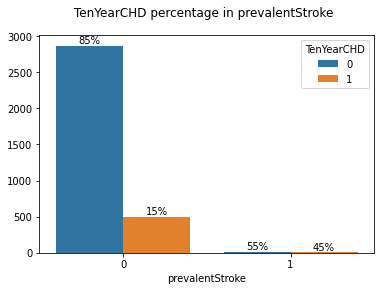

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(df_copy['prevalentStroke'])  


plt.figure(figsize=(6,4))
a = sns.countplot( x='prevalentStroke',data=df_copy, hue="TenYearCHD")
a.set_ylabel('')
plt.suptitle(' TenYearCHD percentage in prevalentStroke')

bars = a.patches
half = int(len(bars)/2)       #this will divide the a.patches into 2 equal parts(blue and orange) 
left_bars = bars[:half]  #blue color bar
right_bars = bars[half:]   #orange color bar


for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()   #getting the height of left part
        height_r = right.get_height()  #getting the height of rigtht part
        total = height_l + height_r    #combining both the heights of both halfs and finding total height of bars i.e. a.patches


        a.text(left.get_x() + left.get_width()/2., height_l + 30, '{0:.0%}'.format(height_l/total), ha="center")#ploting percentages on top of the bars and at centre.
        a.text(right.get_x() + right.get_width()/2., height_r + 30, '{0:.0%}'.format(height_r/total), ha="center")

In [ ]:
df_copy['prevalentStroke'].value_counts()

0    3368
1      22
Name: prevalentStroke, dtype: int64

those who have prevalent stroke history has 50% chance of CHD.

PREVALENT HYPERTENSION

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


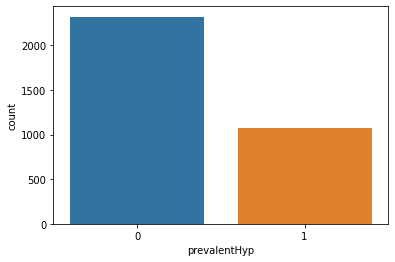

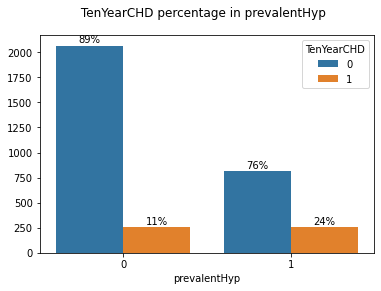

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(df_copy['prevalentHyp'])  


plt.figure(figsize=(6,4))
a = sns.countplot( x='prevalentHyp',data=df_copy, hue="TenYearCHD")
a.set_ylabel('')
plt.suptitle(' TenYearCHD percentage in prevalentHyp')

bars = a.patches
half = int(len(bars)/2)       #this will divide the a.patches into 2 equal parts(blue and orange) 
left_bars = bars[:half]  #blue color bar
right_bars = bars[half:]   #orange color bar


for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()   #getting the height of left part
        height_r = right.get_height()  #getting the height of rigtht part
        total = height_l + height_r    #combining both the heights of both halfs and finding total height of bars i.e. a.patches


        a.text(left.get_x() + left.get_width()/2., height_l + 30, '{0:.0%}'.format(height_l/total), ha="center")#ploting percentages on top of the bars and at centre.
        a.text(right.get_x() + right.get_width()/2., height_r + 30, '{0:.0%}'.format(height_r/total), ha="center")

Those who have privius hypertensipn history has high chances of CHD than those who do not have history of hypewrtension.

DIABETES

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


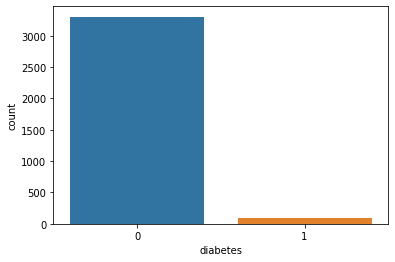

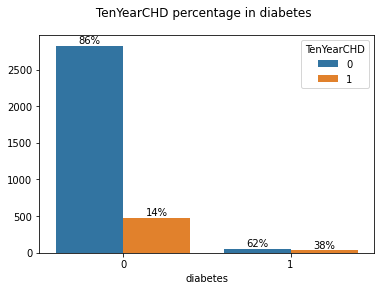

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(df_copy['diabetes'])  


plt.figure(figsize=(6,4))
a = sns.countplot( x='diabetes',data=df_copy, hue="TenYearCHD")
a.set_ylabel('')
plt.suptitle(' TenYearCHD percentage in diabetes')

bars = a.patches
half = int(len(bars)/2)       #this will divide the a.patches into 2 equal parts(blue and orange) 
left_bars = bars[:half]  #blue color bar
right_bars = bars[half:]   #orange color bar


for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()   #getting the height of left part
        height_r = right.get_height()  #getting the height of rigtht part
        total = height_l + height_r    #combining both the heights of both halfs and finding total height of bars i.e. a.patches


        a.text(left.get_x() + left.get_width()/2., height_l + 30, '{0:.0%}'.format(height_l/total), ha="center")#ploting percentages on top of the bars and at centre.
        a.text(right.get_x() + right.get_width()/2., height_r + 30, '{0:.0%}'.format(height_r/total), ha="center")

In [ ]:
df_copy['diabetes'].value_counts()

0    3303
1      87
Name: diabetes, dtype: int64

Those who have diabeties problem they have a chance of CHD.

Numeric Continouis Features

In [ ]:
Numeric_features = ['totChol',	'sysBP',	'diaBP',	'BMI',	'heartRate',	'glucose']

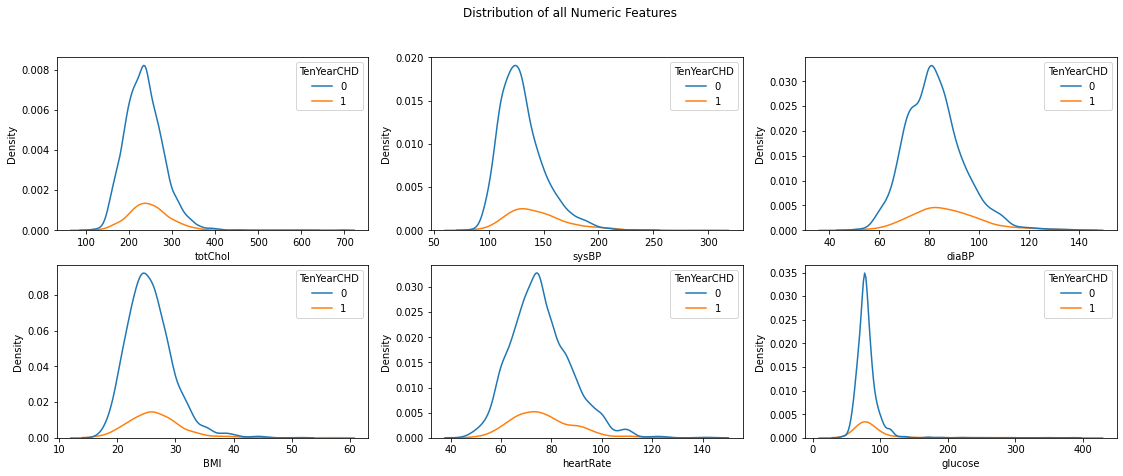

In [ ]:
plt.figure(figsize=(19,7))
plt.suptitle('Distribution of all Numeric Features')
for i in range(0, len(Numeric_features)):
  plt.subplot(2,3,i+1)
  sns.kdeplot(df_copy[Numeric_features[i]],hue=df_copy["TenYearCHD"],fill=False)

here we can see that the disribution of these numeric features is quite symmetric but they still has some skeyness due to oulierrs so we have to scle this features using standrd sclar technique. if we talk about relation between chance of CHD with thses numeric feature then we can say  that it doesnt look any significant impact on chances of CHD by thses features. Atleast now!

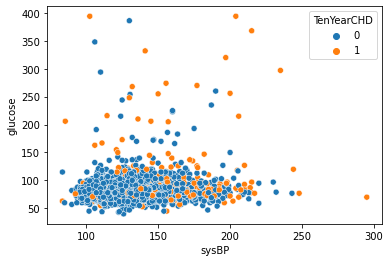

In [ ]:
sns.scatterplot(x=df_copy['sysBP'], y=df_copy['glucose'], hue=df_copy['TenYearCHD'])   

here we can say that patients who have glucose below 150 and sysBP below 125 has less chance of getting CHD than others.

In [ ]:
corrilation = df_copy.corr()

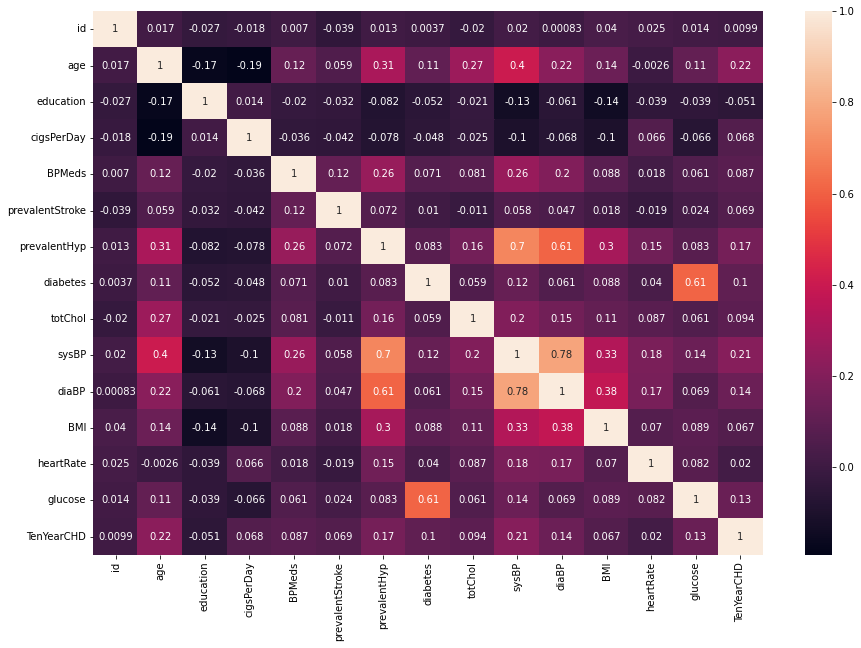

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(corrilation, annot=True)

After seeing the corilation we can drop few columns 

1.   'id' beacuse it does not add any value in target feature
2.   'education' because it is negatively corilated with the target feature.
3.   'prevalenthyp' because it is very less crilated with target feature and it is highly corilated with two features 'sysBP' and 'diaBP'.
4.   'diaBP' because it is highly corilated with 'sysBP' and among this two features 'diaBP' has less corilation with the target feature.
5.   'diabetes' because it is highly corilated with 'glucose' and among this 'diabeties' has less corilation with target feature.







In [ ]:
dff = df_copy.copy()

In [ ]:
dff = dff.drop(['id','education','prevalentHyp','diaBP','diabetes'], axis=1)

###**Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dff['sex']=le.fit_transform(dff['sex'])
dff['is_smoking']=le.fit_transform(dff['is_smoking'])

In [ ]:
dff.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD
0,64,0,1,3.0,0.0,0,221.0,148.0,25.794964,90.0,80.0,1
1,36,1,0,0.0,0.0,0,212.0,168.0,29.770000,72.0,75.0,0
2,46,0,1,10.0,0.0,0,250.0,116.0,20.350000,88.0,94.0,0
3,50,1,1,20.0,0.0,0,233.0,158.0,28.260000,68.0,94.0,1
4,64,0,1,30.0,0.0,0,241.0,136.5,26.420000,70.0,77.0,0


Lets scale some features

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
column_to_scale = ['age','cigsPerDay','BMI','totChol','sysBP','heartRate','glucose']
dff[column_to_scale] = scalar.fit_transform(dff[column_to_scale])

In [ ]:
dff.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD
0,1.682783,0,1,-0.506751,0.0,0,-0.357314,0.690879,-8.651790e-16,1.171675,-0.074275,1
1,-1.576210,1,0,-0.759679,0.0,0,-0.557375,1.588193,9.680255e-01,-0.332292,-0.290185,0
2,-0.412284,0,1,0.083414,0.0,0,0.287325,-0.744824,-1.325992e+00,1.004567,0.530271,0
3,0.053287,1,1,0.926507,0.0,0,-0.090567,1.139536,6.003008e-01,-0.666507,0.530271,1
4,1.682783,0,1,1.769600,0.0,0,0.087264,0.174923,1.522126e-01,-0.499400,-0.203821,0


Now lets split the data into train and test

In [ ]:
x= dff.drop(['TenYearCHD'], axis=1)
y=dff['TenYearCHD']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

Logistics Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
y_train_pred = clf.predict(x_train)
y_test_pred= clf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[2286,   12],
       [ 379,   35]])

In [ ]:
confusion_matrix(y_test, y_test_pred)

array([[579,   2],
       [ 87,  10]])

In [ ]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       581
           1       0.83      0.10      0.18        97

    accuracy                           0.87       678
   macro avg       0.85      0.55      0.56       678
weighted avg       0.86      0.87      0.82       678



Here we can see that the recall score is very less that means this model is not able to predict the minority class acurately. he need to handle the imbalance data to get right recall and pricision score.

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve
y_lr_predict_pro=clf.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_lr_predict_pro)
roc_auc_score(y_test,y_lr_predict_pro)

0.7286051422183579

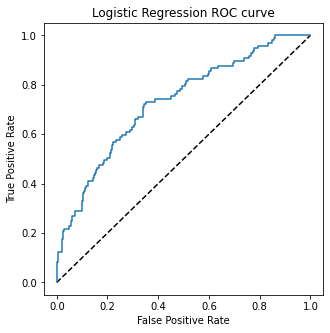

In [ ]:
plt.figure(figsize=(5,5))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC curve')
plt.show()


Handling imbalanced data using SMOTE technique 

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x, y)

In [ ]:
y_sm=pd.DataFrame(y_sm)
y_sm.value_counts()

TenYearCHD
0             2879
1             2879
dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split( x_sm,y_sm , test_size = 0.2, random_state = 0) 
print(x_train.shape)
print(x_test.shape)

(4606, 11)
(1152, 11)


In [ ]:
clff = LogisticRegression(fit_intercept=True, max_iter=10000)  
clff.fit(x_train, y_train)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=10000)

In [ ]:
train_class_preds = clff.predict(x_train)
test_class_preds = clff.predict(x_test)
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.6849761181068172
The accuracy on test data is  0.65625


In [ ]:
cm = confusion_matrix(y_train, train_class_preds)
print('Confusion Matrix for training Data')
print(cm)
print('-'*50)
cm = confusion_matrix(y_test, test_class_preds)
print('Confusion Matrix for Test Data')
print(cm)

Confusion Matrix for training Data
[[1562  764]
 [ 687 1593]]
--------------------------------------------------
Confusion Matrix for Test Data
[[359 194]
 [202 397]]


In [ ]:
print(classification_report(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.64      0.65      0.64       553
           1       0.67      0.66      0.67       599

    accuracy                           0.66      1152
   macro avg       0.66      0.66      0.66      1152
weighted avg       0.66      0.66      0.66      1152



In [ ]:
y_lr_predict_pro=clf.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_lr_predict_pro)
roc_auc_score(y_test,y_lr_predict_pro)


0.7004923818177975

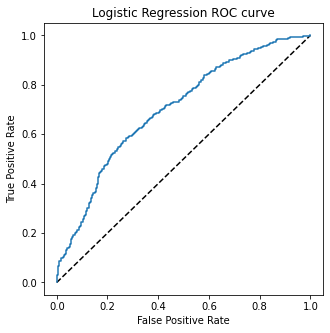

In [ ]:
plt.figure(figsize=(5,5))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC curve')
plt.show()

Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
classifier = RandomForestClassifier() 
grid_values = {'n_estimators':[50, 65, 80, 95,120], 'max_depth':[3, 5, 7,9,12]}
GSclassifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)

GSclassifier.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9, 12],
                         'n_estimators': [50, 65, 80, 95, 120]},
             scoring='roc_auc')

In [ ]:
best_parameters = GSclassifier.best_params_
best_parameters

{'max_depth': 12, 'n_estimators': 95}

In [ ]:
classifier = RandomForestClassifier(max_depth=best_parameters['max_depth'],n_estimators=best_parameters['n_estimators']) 

classifier.fit(x_train, y_train)

<ipython-input-85-9c4458175539>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train, y_train)


RandomForestClassifier(max_depth=12, n_estimators=95)

In [ ]:
y_train_preds_rf =  classifier.predict(x_train)
y_test_preds_rf= classifier.predict(x_test)


In [ ]:
accuracy_score(y_test,y_test_preds_rf)

0.8333333333333334

In [ ]:
confusion_matrix(y_test,y_test_preds_rf)

array([[434, 119],
       [ 73, 526]])

In [ ]:
print(classification_report(y_test,y_test_preds_rf))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82       553
           1       0.82      0.88      0.85       599

    accuracy                           0.83      1152
   macro avg       0.84      0.83      0.83      1152
weighted avg       0.83      0.83      0.83      1152



In [ ]:
y_rf_predict_pro=classifier.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_rf_predict_pro)
roc_auc_score(y_test,y_rf_predict_pro)

0.9149788526386654

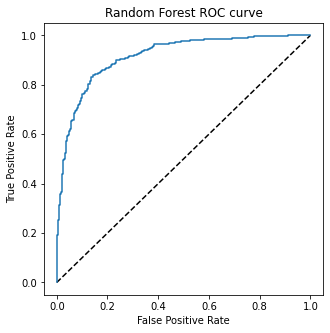

In [ ]:
plt.figure(figsize=(5,5))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC curve')
plt.show()

In [ ]:
features = x.columns
importances_rf = classifier.feature_importances_
indices = np.argsort(importances_rf)

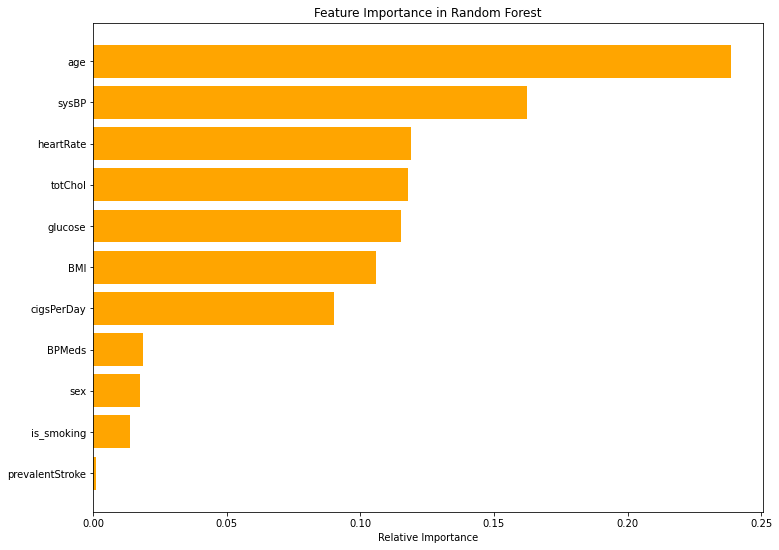

In [ ]:
plt.figure(figsize=(12,9))
plt.title('Feature Importance in Random Forest')
plt.barh(range(len(indices)), importances_rf[indices], color='orange', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Gradient Boosting 

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
gbclassifier = GradientBoostingClassifier() 
grid_values = {'n_estimators':[50, 65, 80, 95,120], 'max_depth':[3, 5, 7,9,12], 'learning_rate':[0.01,0.1,0.5,1]}
GSclassifierr = GridSearchCV(gbclassifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)

GSclassifierr.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 1],
                         'max_depth': [3, 5, 7, 9, 12],
                         'n_estimators': [50, 65, 80, 95, 120]},
             scoring='roc_auc')

In [ ]:
bestvalues=GSclassifierr.best_params_
bestvalues

{'learning_rate': 0.5, 'max_depth': 12, 'n_estimators': 120}

In [ ]:
gbclassifierr = GradientBoostingClassifier(max_depth=bestvalues['max_depth'],n_estimators=bestvalues['n_estimators'], learning_rate=bestvalues['learning_rate']) 

gbclassifierr.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(learning_rate=0.5, max_depth=12, n_estimators=120)

In [ ]:
y_train_preds_gb =  gbclassifierr.predict(x_train)
y_test_preds_gb = gbclassifierr.predict(x_test)


In [ ]:
accuracy = accuracy_score(y_test,y_test_preds_gb)
print('accuracy score of gradientboosting:', accuracy )
print('--'*100)
confusion_matrix(y_test,y_test_preds_gb)

accuracy score of gradientboosting: 0.9149305555555556
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


array([[516,  37],
       [ 61, 538]])

In [ ]:
from sklearn.metrics import recall_score, precision_score

In [ ]:
print(recall_score(y_test,y_test_preds_gb))
print('-'*100)
print(precision_score(y_test,y_test_preds_gb))

0.8981636060100167
----------------------------------------------------------------------------------------------------
0.9356521739130435


In [ ]:
print(classification_report(y_test,y_test_preds_gb))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       553
           1       0.94      0.90      0.92       599

    accuracy                           0.91      1152
   macro avg       0.91      0.92      0.91      1152
weighted avg       0.92      0.91      0.91      1152



In [ ]:
y_gb_predict_pro=gbclassifierr.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_gb_predict_pro)
roc_auc_score(y_test,y_gb_predict_pro)

0.9727303190670407

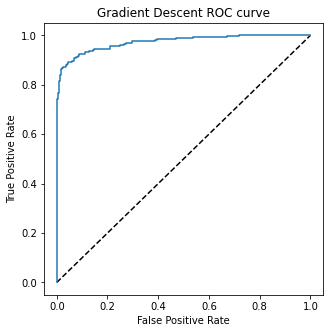

In [ ]:
plt.figure(figsize=(5,5))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Gradient Descent')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Descent ROC curve')
plt.show()

In [ ]:
features = x.columns
importances_gb = gbclassifierr.feature_importances_
indices = np.argsort(importances_gb)

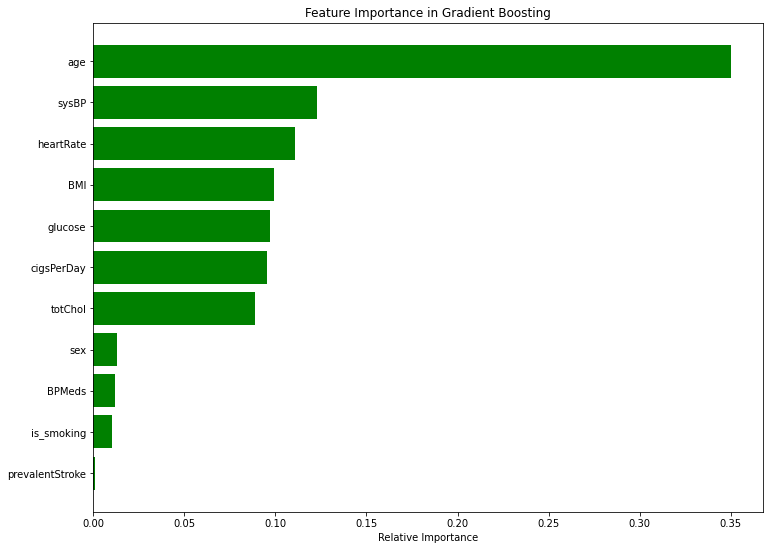

In [ ]:
plt.figure(figsize=(12,9))
plt.title('Feature Importance in Gradient Boosting')
plt.barh(range(len(indices)), importances_gb[indices], color='Green', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Hence from the above models predidictions, after checking score of evaluation metrics we can say that the Gradient boosting algorithm has given us best predictions with recall score of 0.90, precision score of 0.95, f1 score of 0.93 and roc_auc_score of 0.975

Conclusion
 1)  Know we can say that the most imporant features in predicting the cances  of CHD after ten years are age, glucose, sysBP, BMI, totchol, heartrate and cigs per day.
 2)  Best model for prediction of CHD is Gradient boosting model (gbclassifierr).